# Descente de gradient à pas optimal

### Import des librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np

### Fonction permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [2]:
def courbes_de_niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5, optimal=None, bar=True, ax=None, **kwargs):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])    
    if 'cmap' not in kwargs: kwargs['cmap'] = 'RdBu'
    plt.contour(x1_values, x2_values, fct_values, 40, **kwargs)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.axis('equal')
    if bar:
        plt.colorbar()
    if optimal is not None: 
        plt.scatter(*optimal, s=200, marker='*', c='r')

### Fonction permettant de dessiner la trajectoire de l'algorithme ci-dessous

In [3]:
# w_list sous la forme d'une liste  coordonnées [[w00,b0],[w01,b1],...]
def trajectoire(w_list, fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, w_opt=None, ax=None):
    courbes_de_niveaux(fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, optimal=w_opt, ax=ax)     
    if len(w_list) > 0:
        trajectory = np.array(w_list)
        plt.plot(trajectory[:,0], trajectory[:,1], 'o--')
    plt.title('Trajectoire de la descente de gradient')
    plt.xlabel('$b$')
    plt.ylabel('$w_1$')

### Fonction $f(w_0,b)$ à optimiser et son gradient

Eventuellement, on régularise la fonction en choisissant $\lambda\neq 0$ (noté rlambda ci-dessous)

In [4]:
rlambda=0
def f(b,w0):
  return (w0*3+b-4)**2+(w0*1+b-0)**2+(w0*7+b-6)**2+rlambda*(b**2+w0**2)
def df(b,w0):
  return [2*(w0*3+b-4)*1+2*(w0*1+b-0)*1+2*(w0*7+b-6)*1+2*rlambda*b,2*(w0*3+b-4)*3+2*(w0*1+b-0)*1+2*(w0*7+b-6)*7+2*rlambda*w0]

### Courbes de niveaux de $f$

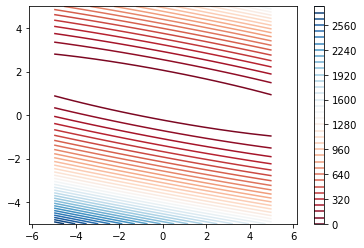

In [5]:
courbes_de_niveaux(f)

## Algorithme

### Principe
On part d'un point initial $X=(b,w_1)$ livré par l'algorithme principal (descente de gradient en 2 variables).
On considère la direction $$H=(h_1,h_2)=-[\text{grad} f](X).$$
Le sens du vecteur $H$, opposé au gradient, indique les niveaux décroissants de $f$.

On considère la droite constituée des points $X+t H$, $t\geq 0$.

Le long de cette droite, il existe un $t^*$ minimisant la fonction d'une variable :
$$F_{X,H}:t\mapsto F_{X,H}(t)=f(X+tH)=f\left(b+th_1,w_1+th_2\right).$$
C'est ce $t^*$ qui va être utilisé comme pas dans l'algorithme principal.

### Mise en place
Pour déterminer $t^*$, on utilise l'algorithme de descente de gradient en une variable, appliqué à la fonction $F_{X,H}(t)$.

- En un $t\in\mathbb{R}$ quelconque, la dérivée de $t\mapsto F_{X,H}(t)$ est :
$$F_{X,H}'(t)=\frac{\partial f(X+tH)}{\partial b}\times h_1+\frac{\partial f(X+tH)}{\partial w_1}\times h_2=[\text{grad}f](X+tH)\cdot h.$$
En particulier, le minimum de $F_{X,H}$ en $t^*$ tel que $[\text{grad}f](X+t^*H)$ et $H$ sont orthogonaux.

- L'algorithme de descente de gradient appliqué à $F_{X,H}$ est alors donné, avec un tau d'apprentissage $\tau$, par :

 * Initialisation : $t_0=0$.

 * Récurrence :
     * Calculer $\delta=F'_{x,h}(X+t_iH)=[\text{grad}f](X+t_iH)\cdot H$
     * Tant que $\delta$ n'est pas suffisamment près de $0$, poser : $t_{i+1}=t_i-\tau \delta$



In [6]:
def optimal_step(gradf,H,X0,tau,tolerance,Nbiterations):
    H=[-H[0],-H[1]]
    t=0
    for i in range(Nbiterations):
        g=np.dot(gradf(X0[0]+t*H[0],X0[1]+t*H[1]),H) #produit scalaire de [grad f](X+tH) et H        
        if abs(g)< tolerance:
            return t
        t=t-tau*g
    return t

def descente(gradf,X0,tau,tolerance=1e-6,Nbiterations=20,NbiterPasOptimal=1000):
    x=X0[0]
    y=X0[1]
    L=[]
    for i in range(Nbiterations):
        g = gradf(x,y)
        if g[0]**2+g[1]**2< tolerance:
            print('L\'algorithme a convergé','\n Solution atteinte :\n','b=',x,'w1=',y)
            return L
        L.append([x,y]) # On enregistre les différents points pour l'illustration graphique seulement
        t=optimal_step(gradf,g,[x,y],tau,tolerance,NbiterPasOptimal)
        x=x-t*g[0]
        y=y-t*g[1]
    print('L\'algorithme n\'a pas convergé','\n Solution atteinte :\n ','b=',x,'w1=',y)
    return L

L'algorithme n'a pas convergé 
 Solution atteinte :
  b= -1.409609367439682 w1= 1.1820007199404943


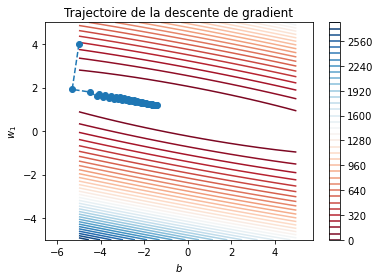

In [20]:
Xi=descente(df,[-5,4],1e-7,1,50,10000)
trajectoire(Xi,f)
# Remarquer la trajectoire faite de segments perpendiculaires